In [62]:
import pandas as pd
#%matplotlib notebook
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as st
import sklearn.datasets as dta
import seaborn as sns
# Dependencies
import json
import requests


In [63]:
csv_path = "archive/imdb_top_1000.csv"

# Import the CSV into a pandas DataFrame
topmovies_df = pd.read_csv(csv_path, low_memory=False)


In [64]:
topmovies_df.loc[:,"Gross"]=topmovies_df.loc[:,"Gross"].str.replace(",","").astype(float)

In [65]:
clean_movies_df=topmovies_df[['Poster_Link' , 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre','IMDB_Rating' ,'Overview' , 'Meta_score' , 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes' , 'Gross']].dropna()

clean_movies_df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [66]:
Gross= clean_movies_df["Gross"]/1000000
clean_movies_df["Gross"] = Gross

In [67]:
No_of_Votes= clean_movies_df["No_of_Votes"]/100000
clean_movies_df["No_of_Votes"] = No_of_Votes

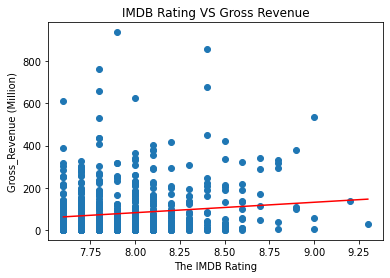

In [68]:
#Corrlation movie IMDB Rating Vs Gross Revenue by Rating
IMDB_Rating = clean_movies_df['IMDB_Rating']
Gross_Revenue = clean_movies_df['Gross']
x_values = IMDB_Rating
y_values = Gross_Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("IMDB Rating VS Gross Revenue")
plt.xlabel('The IMDB Rating')
plt.ylabel('Gross_Revenue (Million)')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

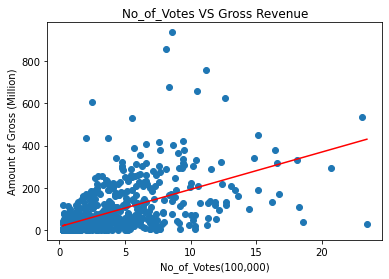

In [69]:
No_of_Votes = clean_movies_df['No_of_Votes']
Gross_Revenue = clean_movies_df['Gross']
x_values = No_of_Votes
y_values = Gross_Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("No_of_Votes VS Gross Revenue")
plt.xlabel('No_of_Votes(100,000)')
plt.ylabel('Amount of Gross (Million)')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

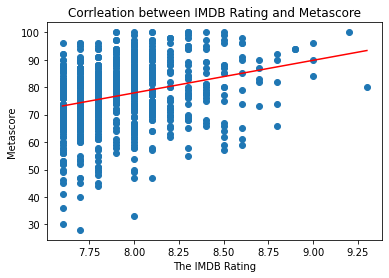

In [70]:
#Correlation between IMDB Rating and Meta score
IMDB_Rating = clean_movies_df['IMDB_Rating']
Meta_score = clean_movies_df['Meta_score']
x_values = IMDB_Rating
y_values = Meta_score
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Corrleation between IMDB Rating and Metascore")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The IMDB Rating')
plt.ylabel('Metascore')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

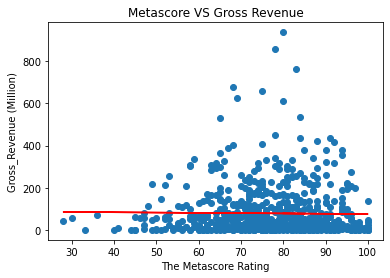

In [71]:
#Corrlation movie IMDB Rating Vs Gross Revenue by Rating
Meta_score = clean_movies_df['Meta_score']
Gross_Revenue = clean_movies_df['Gross']
x_values = Meta_score
y_values = Gross_Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Metascore VS Gross Revenue")
plt.xlabel('The Metascore Rating')
plt.ylabel('Gross_Revenue (Million)')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3883062578187025


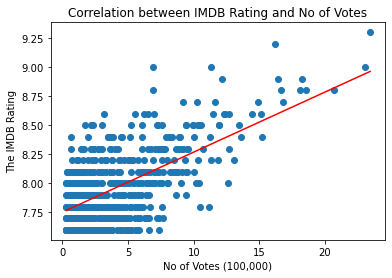

In [72]:
#Correlation between IMDB Rating and No of Votes
No_of_Votes = clean_movies_df['No_of_Votes']
IMDB_Rating = clean_movies_df['IMDB_Rating']
x_values = No_of_Votes
y_values = IMDB_Rating
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation between IMDB Rating and No of Votes')
plt.xlabel('No of Votes (100,000)')
plt.ylabel('The IMDB Rating')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3883062578187025


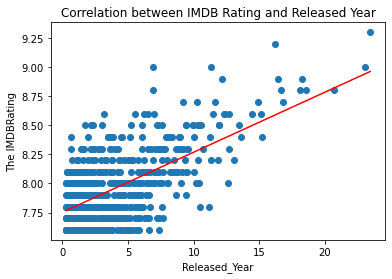

In [73]:
# IMDB Rating Vs Released year 
Released_Year = clean_movies_df['Released_Year']
IMDB_Rating = clean_movies_df['IMDB_Rating']
x_values = No_of_Votes
y_values = IMDB_Rating
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation between IMDB Rating and Released Year')
plt.xlabel('Released_Year')
plt.ylabel('The IMDBRating')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [74]:
clean_movies_df.corr()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.280894,0.623142,0.125992
Meta_score,0.280894,1.000000,0.029744,-0.014801
No_of_Votes,0.623142,0.029744,1.000000,0.544882
Gross,0.125992,-0.014801,0.544882,1.000000


In [75]:
clean_movies_df.describe(include = ['O'])

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,714,714,714,714,714,714,714,714,714,714,714,714
unique,714,714,83,12,118,172,714,402,472,599,626,671
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,2014,U,130 min,Drama,Two imprisoned men bond over a number of years...,Steven Spielberg,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,1,1,28,183,20,58,1,13,12,7,5,4


In [76]:
top_voted = clean_movies_df.sort_values(['No_of_Votes'], ascending = False)

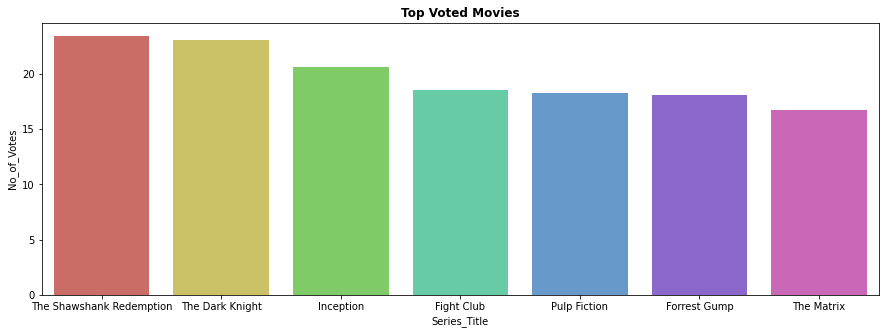

In [77]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

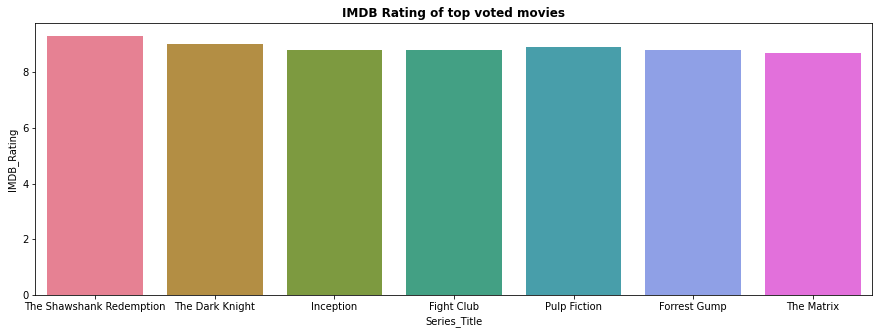

In [78]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['IMDB_Rating'][:7], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()


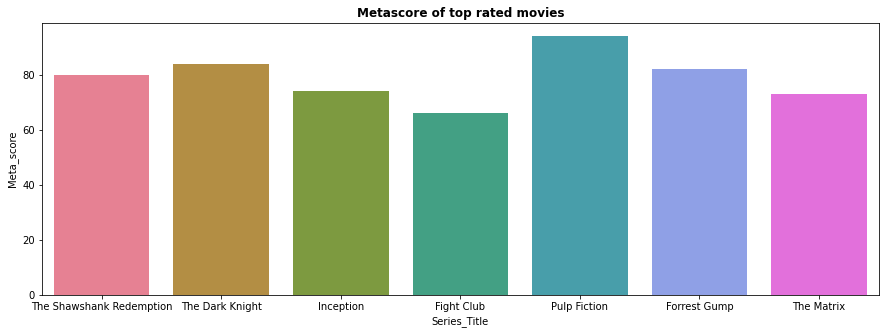

In [79]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'husl')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

In [80]:
clean_movies_df.loc[clean_movies_df['Gross']==0]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


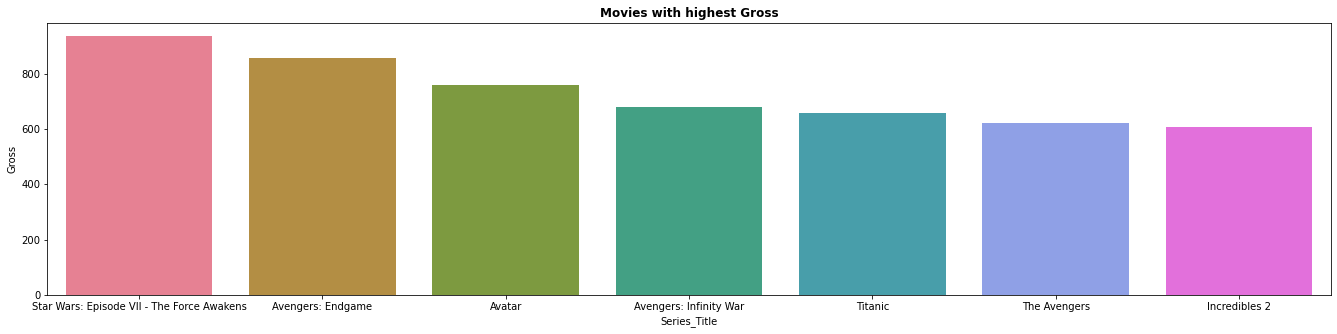

In [82]:
#top movies by Gross
highest_earning = clean_movies_df.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(23,5))
g=sns.barplot(x=highest_earning['Series_Title'][:7],y=highest_earning['Gross'][:7], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()
